In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor



In [11]:
data = pd.read_csv('./clustered_data_v2.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        21613 non-null  float64
 1   bedrooms                     21613 non-null  int64  
 2   bathrooms                    21613 non-null  float64
 3   sqft_lot_normalized          21613 non-null  float64
 4   floors                       21613 non-null  float64
 5   waterfront                   21613 non-null  int64  
 6   view                         21613 non-null  int64  
 7   condition                    21613 non-null  int64  
 8   yr_built                     21613 non-null  int64  
 9   yr_renovated                 21613 non-null  int64  
 10  zipcode                      21613 non-null  int64  
 11  lat                          21613 non-null  float64
 12  long                         21613 non-null  float64
 13  nearest_station_

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000e+00
sqft_lot_normalized,21613.0,8.990134,0.902288,6.255750,8.525360,8.938400,9.276970,1.431711e+01
floors,21613.0,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000e+00
view,21613.0,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000e+00
yr_built,21613.0,1971.005136,29.373411,1900.000000,1951.000000,1975.000000,1997.000000,2.015000e+03
yr_renovated,21613.0,84.402258,401.679240,0.000000,0.000000,0.000000,0.000000,2.015000e+03


**Summary Statistics:**

The average price is $534,099.10 with a standard deviation of $299,196.50.

The bedrooms range from 0 to 33, and bathrooms range from 1.25 to 8.

sqft_lot_normalized ranges from 6.26 to 13.89, indicating some variation in lot sizes.

Other features like floors, waterfront, view, condition, etc., have their respective ranges and statistics.

In [12]:
cluster_zero = data[data['cluster_all_data']==0]
cluster_zero.head(5)

,price,bedrooms,bathrooms,sqft_lot_normalized,floors,waterfront,view,condition,yr_built,yr_renovated,...,is_near_shore,grade_living_normalized,bedrooms_cat,lot_size_category,grade_living_category,outliers_ecod,cluster_all_data,cluster_no_outlier,sqft_lot,grade_living
1,538000.0,3,2.25,8.887791,2.0,0,0,3,1951,1991,...,False,9.797627,3-4,1,2,0,0,0.0,7242,17990
4,510000.0,3,2.00,8.997271,1.0,0,0,3,1987,0,...,False,9.506065,3-4,1,1,0,0,2.0,8080,13440
5,1225000.0,4,4.50,11.532051,1.0,0,0,3,2001,0,...,False,10.995763,3-4,2,2,0,0,0.0,101930,59620
6,257500.0,3,2.25,8.827615,2.0,0,0,3,1995,0,...,False,9.393162,3-4,1,1,0,0,0.0,6819,12005
7,291850.0,3,1.50,9.181118,1.0,0,0,3,1963,0,...,False,8.912069,3-4,2,0,0,0,2.0,9711,7420


In [13]:
filtered_data = cluster_zero.copy()

EDA

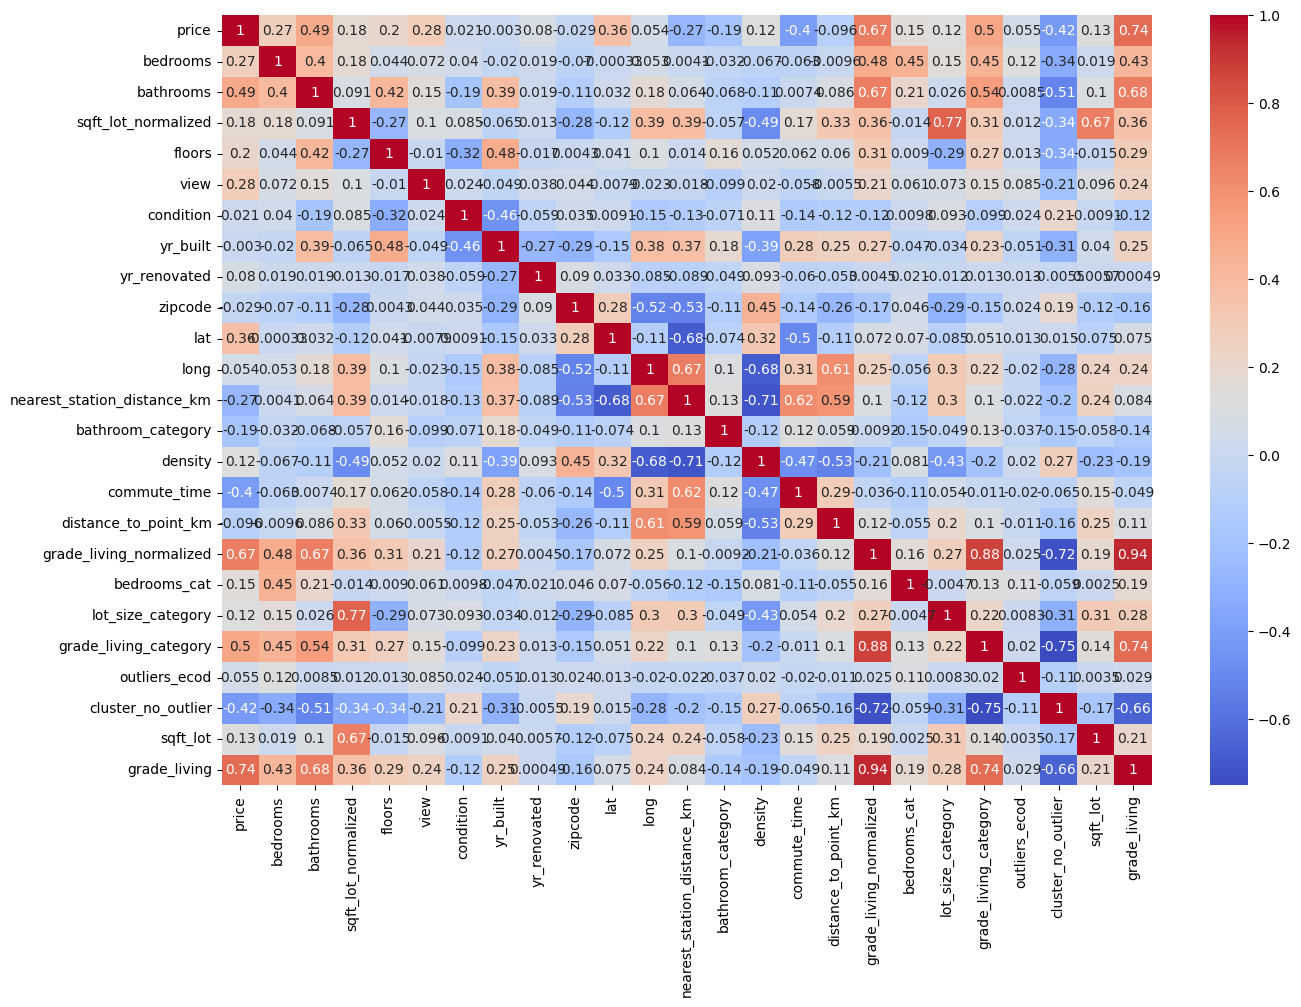

In [15]:
from sklearn.preprocessing import LabelEncoder

# Replace 'filtered_data' with your actual DataFrame variable if needed
data = filtered_data.copy()

# Identify boolean columns and convert them to integers
boolean_columns = data.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    data[col] = data[col].astype(int)

# Identify non-numeric columns (object type) and apply label encoding
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Handle any constant columns by dropping them
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]
data.drop(columns=constant_columns, inplace=True)

# Recompute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
# Sort the features by their correlation with 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
price_correlations

price                          1.000000
grade_living                   0.736532
grade_living_normalized        0.674007
grade_living_category          0.504452
bathrooms                      0.489837
lat                            0.364834
view                           0.284927
bedrooms                       0.268595
floors                         0.202595
sqft_lot_normalized            0.184013
bedrooms_cat                   0.150584
sqft_lot                       0.128657
density                        0.122232
lot_size_category              0.120963
yr_renovated                   0.080113
outliers_ecod                  0.054969
long                           0.054183
condition                      0.021154
yr_built                      -0.002972
zipcode                       -0.028661
distance_to_point_km          -0.095670
bathroom_category             -0.187581
nearest_station_distance_km   -0.269393
commute_time                  -0.401918
cluster_no_outlier            -0.420857


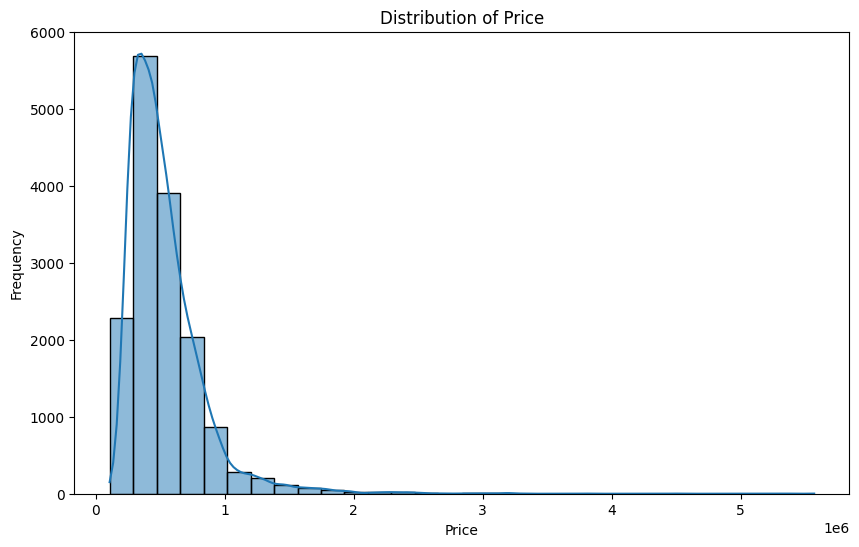

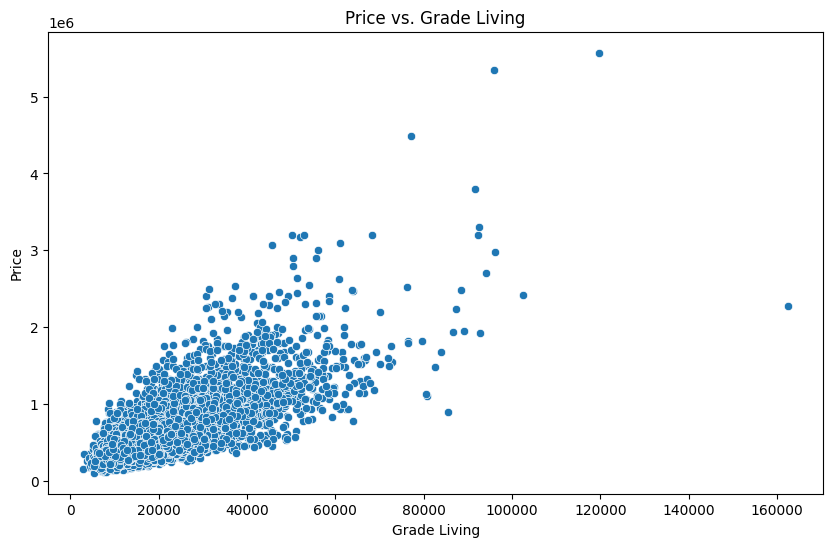

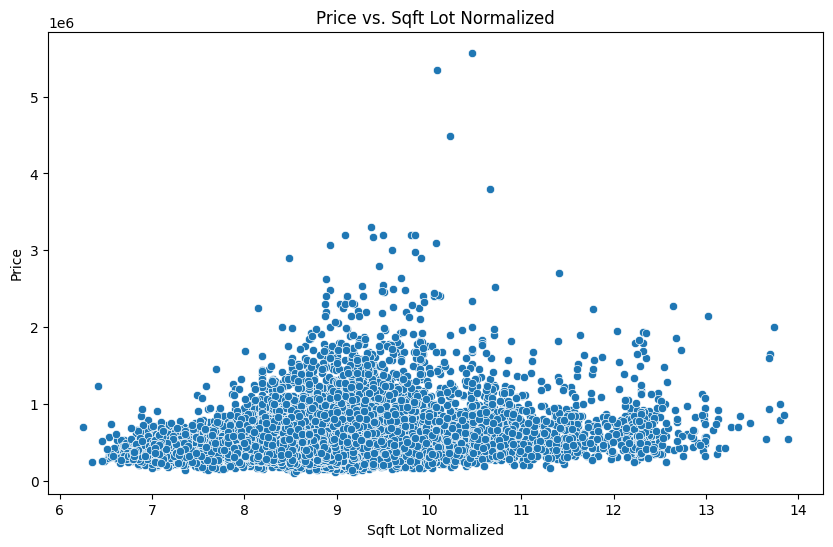

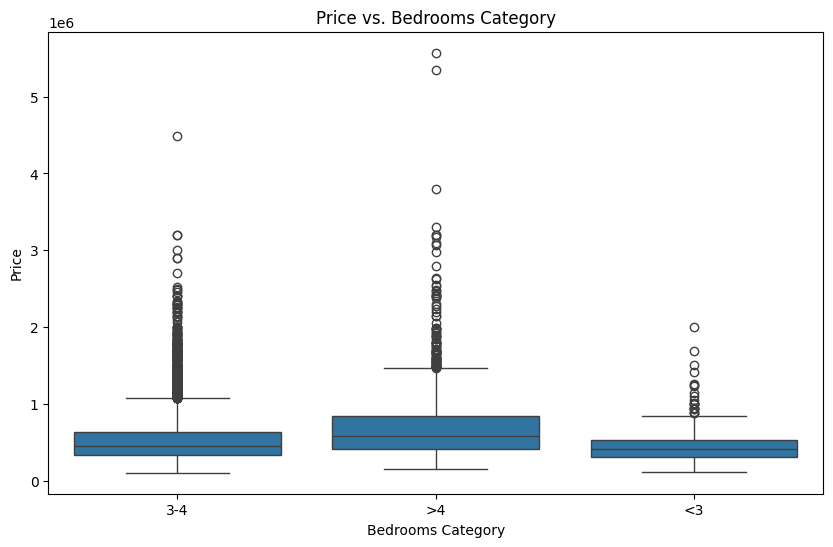

In [21]:
# Distribution plot for price
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for price vs. grade_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade_living', y='price', data=filtered_data)
plt.title('Price vs. Grade Living')
plt.xlabel('Grade Living')
plt.ylabel('Price')
plt.show()

# Scatter plot for price vs. sqft_lot_normalized
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot_normalized', y='price', data=filtered_data)
plt.title('Price vs. Sqft Lot Normalized')
plt.xlabel('Sqft Lot Normalized')
plt.ylabel('Price')
plt.show()

# Box plot for price vs. bedrooms_cat
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms_cat', y='price', data=filtered_data)
plt.title('Price vs. Bedrooms Category')
plt.xlabel('Bedrooms Category')
plt.ylabel('Price')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importances.head(10)
top_features


,feature,importance
17,grade_living_normalized,0.317697
23,grade_living,0.238020
10,lat,0.148599
14,commute_time,0.110204
12,nearest_station_distance_km,0.057410
11,long,0.020495
7,yr_built,0.017740
2,sqft_lot_normalized,0.015549
22,sqft_lot,0.014994
15,distance_to_point_km,0.013646


**Principal Component Analysis (PCA)**

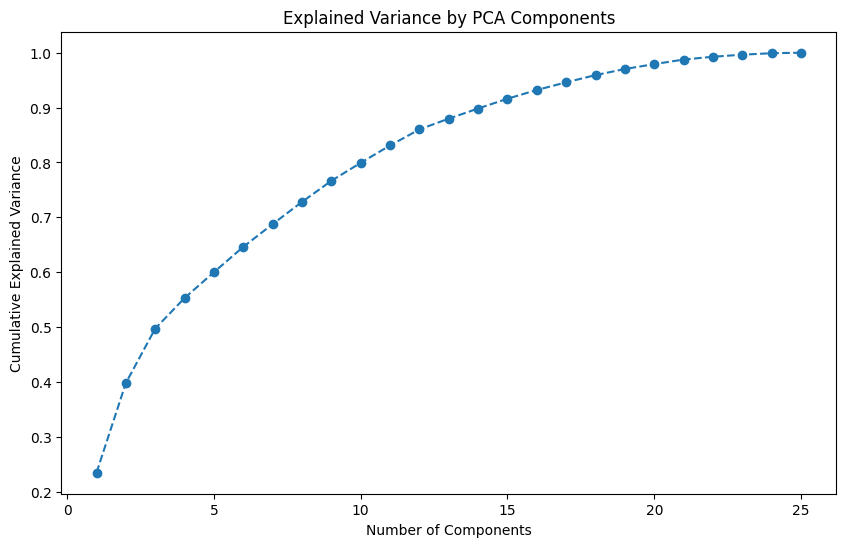

Number of components to retain: 18


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,price
0,-0.699340,-2.352386,0.016155,-1.108737,2.557984,1.690130,4.331713,-0.688429,-1.416781,-0.003233,0.159110,0.151798,0.685018,0.574175,-0.294767,0.223535,-0.857419,-0.217455,NaN
1,-0.650131,1.229620,-0.151242,-0.531498,-0.076092,-0.724423,-0.202247,-0.138218,-0.187027,-0.627306,-0.346045,0.763730,0.264936,-1.281924,-0.324431,0.177812,0.224237,-0.220787,538000.0
2,6.739197,-1.906132,-1.859299,-1.178119,0.902770,-1.777986,-1.092887,-1.386861,0.516217,-1.287596,1.300498,1.117068,0.128046,-1.629174,0.625388,-1.404899,-0.231664,0.910746,NaN
3,0.148217,1.932445,1.538238,0.593830,0.442702,1.413706,-0.306444,0.102741,-0.022649,-0.937291,-0.288414,-0.909864,-0.371119,1.139149,-0.234973,0.134709,-0.649399,0.322134,NaN
4,-3.067937,1.423576,-1.218616,0.170623,1.256292,0.026755,-0.235033,-0.159946,1.212201,-0.805839,-0.919869,1.346089,0.028993,0.942830,0.218457,-0.560847,1.203436,-0.464853,510000.0


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



# Convert boolean columns to integers
boolean_columns = data.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    data[col] = data[col].astype(int)

# Identify non-numeric columns (object type) and apply label encoding
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Choose the number of components that explain a desired amount of variance (e.g., 95%)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components to retain: {n_components}')

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
data_pca_df = pd.DataFrame(data_pca, columns=columns)

# Add the target variable back to the DataFrame
data_pca_df['price'] = data['price']

# Display the DataFrame with principal components
data_pca_df.head()


In [18]:
# Determine the number of components to keep for 95% explained variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components to retain to explain 95% of variance: {n_components_95}')


Number of components to retain to explain 95% of variance: 18


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importances.head(10)
top_features


,feature,importance
17,grade_living_normalized,0.317697
23,grade_living,0.238020
10,lat,0.148599
14,commute_time,0.110204
12,nearest_station_distance_km,0.057410
11,long,0.020495
7,yr_built,0.017740
2,sqft_lot_normalized,0.015549
22,sqft_lot,0.014994
15,distance_to_point_km,0.013646


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
linear_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train Linear Regression
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Regressor (already trained)
y_pred_rf = rf_model.predict(X_test)

# Train Gradient Boosting Regressor
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

evaluation_results = {
    'Linear Regression': evaluate_model(y_test, y_pred_linear),
    'Random Forest Regressor': evaluate_model(y_test, y_pred_rf),
    'Gradient Boosting Regressor': evaluate_model(y_test, y_pred_gb)
}

evaluation_results


{'Linear Regression': {'MSE': 22816418038.714405,
  'MAE': 98748.25636459987,
  'R2': 0.7408391025183292},
 'Random Forest Regressor': {'MSE': 10615997968.379194,
  'MAE': 59161.505842054066,
  'R2': 0.8794179017722904},
 'Gradient Boosting Regressor': {'MSE': 10618932815.688013,
  'MAE': 64465.50429831855,
  'R2': 0.8793845662302594}}

C:\Users\MainUser\AppData\Local\Temp\ipykernel_11260\3536835133.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette=palette)


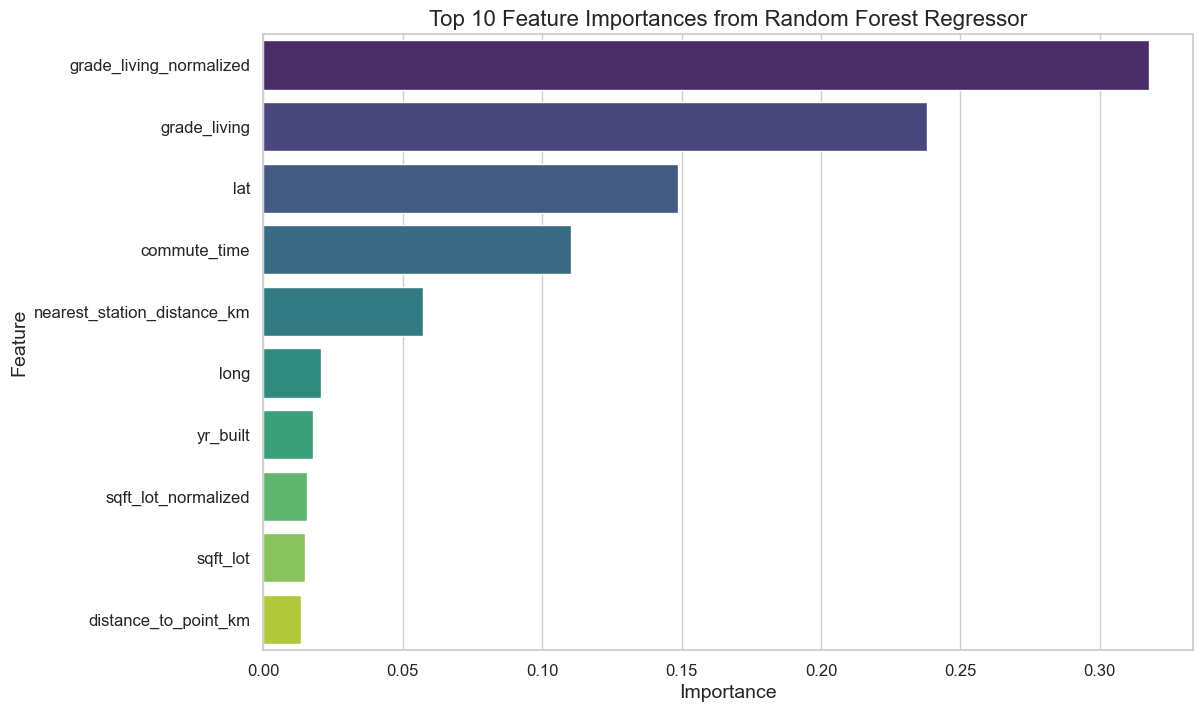

In [26]:

# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Define a color palette with a unique color for each bar
palette = sns.color_palette("viridis", len(top_features))

# Visualize the top 10 feature importances from the Random Forest Regressor with enhanced colors
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features, palette=palette)
plt.title('Top 10 Feature Importances from Random Forest Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Selecting features and target variable
features = filtered_data.drop(['price'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Top 3 most important features
top_features_names = ['grade_living_normalized', 'nearest_station_distance_km', 'lat']

# Prepare the data with the selected features
X_train_top3 = X_train[top_features_names]
X_test_top3 = X_test[top_features_names]

# Train an XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_top3, y_train)

# Predict with the XGBoost Regressor
y_pred_xgb = xgb_model.predict(X_test_top3)

# Evaluate the XGBoost Regressor
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

xgb_evaluation = evaluate_model(y_test, y_pred_xgb)
print(xgb_evaluation)


{'MSE': 12526085057.833935, 'MAE': 67707.23590391401, 'R2': 0.8577221262333209}


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Selecting features and target variable
features = filtered_data.drop(['price'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Top 4 most important features including 'commute_time'
top_features_names_with_commute = ['nearest_station_distance_km', 'grade_living', 'lat', 'bathrooms']

# Prepare the data with the selected features including 'commute_time'
X_train_top4 = X_train[top_features_names_with_commute]
X_test_top4 = X_test[top_features_names_with_commute]

# Train an XGBoost Regressor
xgb_model_with_commute = XGBRegressor(n_estimators=100, random_state=42)
xgb_model_with_commute.fit(X_train_top4, y_train)

# Predict with the XGBoost Regressor
y_pred_xgb_with_commute = xgb_model_with_commute.predict(X_test_top4)

# Evaluate the XGBoost Regressor
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

xgb_evaluation_with_commute = evaluate_model(y_test, y_pred_xgb_with_commute)
print(xgb_evaluation_with_commute)


{'MSE': 12980173591.571684, 'MAE': 68046.1965180863, 'R2': 0.8525643494192772}


In [11]:
filtered_data

,price,bedrooms,bathrooms,sqft_lot_normalized,floors,waterfront,view,condition,yr_built,yr_renovated,...,is_near_shore,grade_living_normalized,bedrooms_cat,lot_size_category,grade_living_category,outliers_ecod,cluster_all_data,cluster_no_outlier,sqft_lot,grade_living
1,538000.0,3,2.25,8.887791,2.0,0,0,3,1951,1991,...,False,9.797627,3-4,1,2,0,0,0.0,7242,17990
4,510000.0,3,2.00,8.997271,1.0,0,0,3,1987,0,...,False,9.506065,3-4,1,1,0,0,2.0,8080,13440
5,1225000.0,4,4.50,11.532051,1.0,0,0,3,2001,0,...,False,10.995763,3-4,2,2,0,0,0.0,101930,59620
6,257500.0,3,2.25,8.827615,2.0,0,0,3,1995,0,...,False,9.393162,3-4,1,1,0,0,0.0,6819,12005
7,291850.0,3,1.50,9.181118,1.0,0,0,3,1963,0,...,False,8.912069,3-4,2,0,0,0,2.0,9711,7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,429000.0,3,2.00,7.027315,3.0,0,0,3,2014,0,...,False,9.386057,3-4,0,1,0,0,2.0,1126,11920
21605,610685.0,4,2.50,8.703507,2.0,0,0,3,2014,0,...,False,10.029283,3-4,1,2,0,0,0.0,6023,22680
21608,360000.0,3,2.50,7.031741,3.0,0,0,3,2009,0,...,False,9.412546,3-4,0,1,0,0,2.0,1131,12240
21609,400000.0,4,2.50,8.668024,2.0,0,0,3,2014,0,...,False,9.824498,3-4,0,2,0,0,0.0,5813,18480


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:6]  # Top 5 features excluding 'price'

# Check multicollinearity using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Iteratively remove features with high VIF
def get_low_vif_features(df, threshold=5):
    while True:
        vif = calculate_vif(df)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif['VIF'] == max_vif, 'Features'].values[0]
            df = df.drop(columns=[feature_to_remove])
        else:
            break
    return df.columns

selected_features = get_low_vif_features(features[high_corr_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features[selected_features], target, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred)

results


{'Linear Regression': {'MSE': 63926165503.87255,
  'MAE': 164737.84106909862,
  'R2': 0.2738929311150141},
 'Random Forest Regressor': {'MSE': 62174660969.71288,
  'MAE': 160413.19915519792,
  'R2': 0.29378744243777444},
 'Gradient Boosting Regressor': {'MSE': 62171761867.55717,
  'MAE': 160414.41873716674,
  'R2': 0.2938203719675232},
 'XGBoost Regressor': {'MSE': 62171727506.700836,
  'MAE': 160414.2562259384,
  'R2': 0.2938207622562333}}

In [13]:
import itertools
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Check multicollinearity using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Iteratively remove features with high VIF
def get_low_vif_features(df, threshold=5):
    while True:
        vif = calculate_vif(df)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif['VIF'] == max_vif, 'Features'].values[0]
            df = df.drop(columns=[feature_to_remove])
        else:
            break
    return df.columns

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    X_train, X_test, y_train, y_test = train_test_split(features[selected_features], target, test_size=0.2, random_state=42)
    combination_results = {'features': selected_features}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    results.append(combination_results)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
results_df


,features,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,XGBoost Regressor
0,"[grade_living, grade_living_normalized, grade_...","{'MSE': 40477639765.99709, 'MAE': 140407.48245...","{'MSE': 47468196821.79099, 'MAE': 147337.09116...","{'MSE': 41335485730.11078, 'MAE': 141402.90736...","{'MSE': 42376306420.27197, 'MAE': 141609.07128..."
1,"[grade_living, grade_living_normalized, bathro...","{'MSE': 40431677994.07486, 'MAE': 140228.37588...","{'MSE': 47587188269.205536, 'MAE': 149035.6352...","{'MSE': 41722686493.11646, 'MAE': 140959.06999...","{'MSE': 44514930542.21719, 'MAE': 143419.89395..."
2,"[grade_living, grade_living_normalized, cluste...","{'MSE': 40181511057.581375, 'MAE': 139243.6800...","{'MSE': 47262319650.316895, 'MAE': 146643.0048...","{'MSE': 40731781772.777664, 'MAE': 140101.1038...","{'MSE': 42935914040.30343, 'MAE': 140675.84079..."
3,"[grade_living, grade_living_normalized, commut...","{'MSE': 28836256340.126545, 'MAE': 116764.0528...","{'MSE': 20309075224.941574, 'MAE': 91417.06486...","{'MSE': 16100616140.724495, 'MAE': 85426.74844...","{'MSE': 16739955292.692776, 'MAE': 81645.86979..."
4,"[grade_living, grade_living_normalized, lat]","{'MSE': 31716154731.681305, 'MAE': 112775.5081...","{'MSE': 22913984392.772507, 'MAE': 90853.98813...","{'MSE': 19428535235.26577, 'MAE': 86091.115703...","{'MSE': 22268595905.82672, 'MAE': 89271.599219..."
...,...,...,...,...,...
115,"[commute_time, bathroom_category_1-2 Bathrooms...","{'MSE': 64070879230.99663, 'MAE': 169413.24131...","{'MSE': 46733960511.64696, 'MAE': 127506.54458...","{'MSE': 45838611356.27569, 'MAE': 133006.42912...","{'MSE': 37520672229.45724, 'MAE': 117562.72804..."
116,"[lat, view, bathroom_category_1-2 Bathrooms]","{'MSE': 61520755223.213844, 'MAE': 160708.9703...","{'MSE': 60347548101.58973, 'MAE': 155104.02666...","{'MSE': 44797194632.28889, 'MAE': 134369.82139...","{'MSE': 46033102793.15139, 'MAE': 135505.25340..."
117,"[lat, view, nearest_station_distance_km]","{'MSE': 68649988732.19852, 'MAE': 174165.78928...","{'MSE': 32157633664.81951, 'MAE': 107128.64938...","{'MSE': 40709072709.5647, 'MAE': 130320.623436...","{'MSE': 32766918636.66766, 'MAE': 110706.13467..."
118,"[lat, bathroom_category_1-2 Bathrooms, nearest...","{'MSE': 67302631718.513016, 'MAE': 166309.9122...","{'MSE': 30256681416.288246, 'MAE': 102311.5443...","{'MSE': 41904852842.062164, 'MAE': 125655.3556...","{'MSE': 30571340547.94596, 'MAE': 105414.21971..."


In [16]:
import itertools
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Function to check if features have similar names
def has_similar_names(features):
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if features[i].split('_')[0] == features[j].split('_')[0]:
                return True
    return False

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    if has_similar_names(selected_features):
        continue
    X_train, X_test, y_train, y_test = train_test_split(features[selected_features], target, test_size=0.2, random_state=42)
    combination_results = {'features': selected_features}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    results.append(combination_results)

# Flatten the results for easier analysis
flattened_results = []
for result in results:
    features = result['features']
    for model_name, metrics in result.items():
        if model_name != 'features':
            flattened_results.append({
                'features': features,
                'model': model_name,
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'R2': metrics['R2']
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(flattened_results)

# Display the results
results_df


,features,model,MSE,MAE,R2
0,"[grade_living, bathrooms, cluster_no_outlier]",Linear Regression,4.038216e+10,139250.376713,0.541318
1,"[grade_living, bathrooms, cluster_no_outlier]",Random Forest Regressor,4.780995e+10,149050.924752,0.456949
2,"[grade_living, bathrooms, cluster_no_outlier]",Gradient Boosting Regressor,4.108075e+10,139765.481564,0.533383
3,"[grade_living, bathrooms, cluster_no_outlier]",XGBoost Regressor,4.478716e+10,142233.665343,0.491284
4,"[grade_living, bathrooms, commute_time]",Linear Regression,2.920868e+10,117042.818795,0.668232
...,...,...,...,...,...
387,"[lat, bathroom_category_1-2 Bathrooms, nearest...",XGBoost Regressor,3.057134e+10,105414.219712,0.652755
388,"[view, bathroom_category_1-2 Bathrooms, neares...",Linear Regression,6.614229e+10,176511.119543,0.248721
389,"[view, bathroom_category_1-2 Bathrooms, neares...",Random Forest Regressor,7.924528e+10,188323.986299,0.099890
390,"[view, bathroom_category_1-2 Bathrooms, neares...",Gradient Boosting Regressor,6.085936e+10,166537.204146,0.308727


In [21]:
high_r2 = results_df[results_df['R2'] > 0.80]
high_r2.sort_values(by='R2', ascending=False)

,features,model,MSE,MAE,R2
155,"[grade_living_normalized, lat, nearest_station...",XGBoost Regressor,1.254914e+10,67769.832541,0.857460
71,"[grade_living, lat, nearest_station_distance_km]",XGBoost Regressor,1.254914e+10,67769.832541,0.857460
69,"[grade_living, lat, nearest_station_distance_km]",Random Forest Regressor,1.297149e+10,68046.490797,0.852663
153,"[grade_living_normalized, lat, nearest_station...",Random Forest Regressor,1.297611e+10,68101.128026,0.852611
46,"[grade_living, commute_time, lat]",Gradient Boosting Regressor,1.325481e+10,73427.924612,0.849445
130,"[grade_living_normalized, commute_time, lat]",Gradient Boosting Regressor,1.325517e+10,73427.924612,0.849441
154,"[grade_living_normalized, lat, nearest_station...",Gradient Boosting Regressor,1.355015e+10,73426.605525,0.846090
70,"[grade_living, lat, nearest_station_distance_km]",Gradient Boosting Regressor,1.355015e+10,73426.605525,0.846090
131,"[grade_living_normalized, commute_time, lat]",XGBoost Regressor,1.355463e+10,69540.328676,0.846039
47,"[grade_living, commute_time, lat]",XGBoost Regressor,1.355463e+10,69540.328676,0.846039


In [22]:
import itertools
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Function to check if features have similar names
def has_similar_names(features):
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if features[i].split('_')[0] == features[j].split('_')[0]:
                return True
    return False

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    if has_similar_names(selected_features):
        continue
    X_train, X_test, y_train, y_test = train_test_split(features[selected_features], target, test_size=0.2, random_state=42)
    
    # Adding polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    combination_results = {'features': selected_features}
    
    for name, model in models.items():
        if name == 'Linear Regression':
            model.fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    
    results.append(combination_results)

# Flatten the results for easier analysis
flattened_results = []
for result in results:
    features = result['features']
    for model_name, metrics in result.items():
        if model_name != 'features':
            flattened_results.append({
                'features': features,
                'model': model_name,
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'R2': metrics['R2']
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(flattened_results)

# Display the results
results_df


,features,model,MSE,MAE,R2
0,"[grade_living, bathrooms, cluster_no_outlier]",Linear Regression,4.056351e+10,139651.611246,0.539258
1,"[grade_living, bathrooms, cluster_no_outlier]",Random Forest Regressor,4.780995e+10,149050.924752,0.456949
2,"[grade_living, bathrooms, cluster_no_outlier]",Gradient Boosting Regressor,4.108075e+10,139765.481564,0.533383
3,"[grade_living, bathrooms, cluster_no_outlier]",XGBoost Regressor,4.478716e+10,142233.665343,0.491284
4,"[grade_living, bathrooms, commute_time]",Linear Regression,2.512363e+10,112349.671973,0.714633
...,...,...,...,...,...
387,"[lat, bathroom_category_1-2 Bathrooms, nearest...",XGBoost Regressor,3.057134e+10,105414.219712,0.652755
388,"[view, bathroom_category_1-2 Bathrooms, neares...",Linear Regression,6.528706e+10,175334.888382,0.258435
389,"[view, bathroom_category_1-2 Bathrooms, neares...",Random Forest Regressor,7.924528e+10,188323.986299,0.099890
390,"[view, bathroom_category_1-2 Bathrooms, neares...",Gradient Boosting Regressor,6.085936e+10,166537.204146,0.308727


In [23]:
high_r2 = results_df[results_df['R2'] > 0.80]
high_r2.sort_values(by='R2', ascending=False)

,features,model,MSE,MAE,R2
155,"[grade_living_normalized, lat, nearest_station...",XGBoost Regressor,1.254914e+10,67769.832541,0.857460
71,"[grade_living, lat, nearest_station_distance_km]",XGBoost Regressor,1.254914e+10,67769.832541,0.857460
69,"[grade_living, lat, nearest_station_distance_km]",Random Forest Regressor,1.297149e+10,68046.490797,0.852663
153,"[grade_living_normalized, lat, nearest_station...",Random Forest Regressor,1.297611e+10,68101.128026,0.852611
46,"[grade_living, commute_time, lat]",Gradient Boosting Regressor,1.325481e+10,73427.924612,0.849445
130,"[grade_living_normalized, commute_time, lat]",Gradient Boosting Regressor,1.325517e+10,73427.924612,0.849441
154,"[grade_living_normalized, lat, nearest_station...",Gradient Boosting Regressor,1.355015e+10,73426.605525,0.846090
70,"[grade_living, lat, nearest_station_distance_km]",Gradient Boosting Regressor,1.355015e+10,73426.605525,0.846090
131,"[grade_living_normalized, commute_time, lat]",XGBoost Regressor,1.355463e+10,69540.328676,0.846039
47,"[grade_living, commute_time, lat]",XGBoost Regressor,1.355463e+10,69540.328676,0.846039


In [25]:
import itertools
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)
#print(features.columns)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Function to check if features have similar names
def has_similar_names(features):
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if features[i].split('_')[0] == features[j].split('_')[0]:
                return True
    return False

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    if has_similar_names(selected_features):
        continue
    X_train, X_test, y_train, y_test = train_test_split(features.loc[:, selected_features], target, test_size=0.2, random_state=42)
    
    # Adding polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    combination_results = {'features': selected_features}
    
    for name, model in models.items():
        if name == 'Linear Regression':
            model.fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)
        elif name == 'Random Forest Regressor':
            grid_search_rf = GridSearchCV(model, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
            grid_search_rf.fit(X_train, y_train)
            best_rf = grid_search_rf.best_estimator_
            y_pred = best_rf.predict(X_test)
        elif name == 'XGBoost Regressor':
            grid_search_xgb = GridSearchCV(model, param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)
            grid_search_xgb.fit(X_train, y_train)
            best_xgb = grid_search_xgb.best_estimator_
            y_pred = best_xgb.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    
    results.append(combination_results)

# Flatten the results for easier analysis
flattened_results = []
for result in results:
    features = result['features']
    for model_name, metrics in result.items():
        if model_name != 'features':
            flattened_results.append({
                'features': features,
                'model': model_name,
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'R2': metrics['R2']
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(flattened_results)

# Display the results
results_df


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

,features,model,MSE,MAE,R2
0,"[grade_living, bathrooms, cluster_no_outlier]",Linear Regression,4.056351e+10,139651.611246,0.539258
1,"[grade_living, bathrooms, cluster_no_outlier]",Random Forest Regressor,4.169322e+10,140449.596909,0.526426
2,"[grade_living, bathrooms, cluster_no_outlier]",Gradient Boosting Regressor,4.108075e+10,139765.481564,0.533383
3,"[grade_living, bathrooms, cluster_no_outlier]",XGBoost Regressor,4.173821e+10,139358.762081,0.525915
4,"[grade_living, bathrooms, commute_time]",Linear Regression,2.512363e+10,112349.671973,0.714633
...,...,...,...,...,...
387,"[lat, bathroom_category_1-2 Bathrooms, nearest...",XGBoost Regressor,3.128206e+10,107990.950002,0.644682
388,"[view, bathroom_category_1-2 Bathrooms, neares...",Linear Regression,6.528706e+10,175334.888382,0.258435
389,"[view, bathroom_category_1-2 Bathrooms, neares...",Random Forest Regressor,5.974303e+10,163714.361407,0.321407
390,"[view, bathroom_category_1-2 Bathrooms, neares...",Gradient Boosting Regressor,6.085936e+10,166537.204146,0.308727


In [19]:
print(features)

['view', 'bathroom_category_1-2 Bathrooms', 'nearest_station_distance_km']


In [26]:
high_r2 = results_df[results_df['R2'] > 0.80]
high_r2.sort_values(by='R2', ascending=False)

,features,model,MSE,MAE,R2
69,"[grade_living, lat, nearest_station_distance_km]",Random Forest Regressor,1.168965e+10,64739.560887,0.867223
153,"[grade_living_normalized, lat, nearest_station...",Random Forest Regressor,1.169217e+10,64759.410531,0.867194
71,"[grade_living, lat, nearest_station_distance_km]",XGBoost Regressor,1.210323e+10,68049.242230,0.862525
155,"[grade_living_normalized, lat, nearest_station...",XGBoost Regressor,1.210323e+10,68049.242230,0.862525
47,"[grade_living, commute_time, lat]",XGBoost Regressor,1.244869e+10,68221.699776,0.858601
131,"[grade_living_normalized, commute_time, lat]",XGBoost Regressor,1.244869e+10,68221.699776,0.858601
129,"[grade_living_normalized, commute_time, lat]",Random Forest Regressor,1.270674e+10,67648.631263,0.855670
45,"[grade_living, commute_time, lat]",Random Forest Regressor,1.272152e+10,67667.752808,0.855502
46,"[grade_living, commute_time, lat]",Gradient Boosting Regressor,1.325481e+10,73427.924612,0.849445
130,"[grade_living_normalized, commute_time, lat]",Gradient Boosting Regressor,1.325517e+10,73427.924612,0.849441


In [27]:
filtered_data.head(5)

,price,bedrooms,bathrooms,sqft_lot_normalized,floors,waterfront,view,condition,yr_built,yr_renovated,...,is_near_shore,grade_living_normalized,bedrooms_cat,lot_size_category,grade_living_category,outliers_ecod,cluster_all_data,cluster_no_outlier,sqft_lot,grade_living
1,538000.0,3,2.25,8.887791,2.0,0,0,3,1951,1991,...,False,9.797627,3-4,1,2,0,0,0.0,7242,17990
4,510000.0,3,2.00,8.997271,1.0,0,0,3,1987,0,...,False,9.506065,3-4,1,1,0,0,2.0,8080,13440
5,1225000.0,4,4.50,11.532051,1.0,0,0,3,2001,0,...,False,10.995763,3-4,2,2,0,0,0.0,101930,59620
6,257500.0,3,2.25,8.827615,2.0,0,0,3,1995,0,...,False,9.393162,3-4,1,1,0,0,0.0,6819,12005
7,291850.0,3,1.50,9.181118,1.0,0,0,3,1963,0,...,False,8.912069,3-4,2,0,0,0,2.0,9711,7420


In [28]:
filtered_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'nearest_station_distance_km',
       'bathroom_category', 'density', 'commute_time', 'distance_to_point_km',
       'is_near_shore', 'grade_living_normalized', 'bedrooms_cat',
       'lot_size_category', 'grade_living_category', 'outliers_ecod',
       'cluster_all_data', 'cluster_no_outlier', 'sqft_lot', 'grade_living'],
      dtype='object')

In [29]:
import itertools
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting features and target variable
features = filtered_data.drop(['price', 'outliers_ecod',
       'cluster_all_data', 'cluster_no_outlier', ], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Function to check if features have similar names
def has_similar_names(features):
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if features[i].split('_')[0] == features[j].split('_')[0]:
                return True
    return False

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    if has_similar_names(selected_features):
        continue
    X_train, X_test, y_train, y_test = train_test_split(features.loc[:, selected_features], target, test_size=0.2, random_state=42)
    
    # Adding polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    combination_results = {'features': selected_features}
    
    for name, model in models.items():
        if name == 'Linear Regression':
            model.fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)
        elif name == 'Random Forest Regressor':
            grid_search_rf = GridSearchCV(model, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
            grid_search_rf.fit(X_train, y_train)
            best_rf = grid_search_rf.best_estimator_
            y_pred = best_rf.predict(X_test)
            combination_results['Random Forest Best Params'] = grid_search_rf.best_params_
        elif name == 'XGBoost Regressor':
            grid_search_xgb = GridSearchCV(model, param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)
            grid_search_xgb.fit(X_train, y_train)
            best_xgb = grid_search_xgb.best_estimator_
            y_pred = best_xgb.predict(X_test)
            combination_results['XGBoost Best Params'] = grid_search_xgb.best_params_
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    
    results.append(combination_results)

# Flatten the results for easier analysis
flattened_results = []
for result in results:
    features = result['features']
    rf_params = result.get('Random Forest Best Params', None)
    xgb_params = result.get('XGBoost Best Params', None)
    for model_name, metrics in result.items():
        if model_name not in ['features', 'Random Forest Best Params', 'XGBoost Best Params']:
            flattened_results.append({
                'features': features,
                'model': model_name,
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'R2': metrics['R2'],
                'RF Params': rf_params,
                'XGB Params': xgb_params
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(flattened_results)

# Display the results
results_df


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

,features,model,MSE,MAE,R2,RF Params,XGB Params
0,"[grade_living, bathrooms, commute_time]",Linear Regression,2.512363e+10,112349.671973,0.714633,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
1,"[grade_living, bathrooms, commute_time]",Random Forest Regressor,1.922503e+10,86149.958326,0.781632,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
2,"[grade_living, bathrooms, commute_time]",Gradient Boosting Regressor,1.614994e+10,86018.536454,0.816560,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
3,"[grade_living, bathrooms, commute_time]",XGBoost Regressor,1.599304e+10,80784.801301,0.818343,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
4,"[grade_living, bathrooms, lat]",Linear Regression,3.104269e+10,110792.642009,0.647401,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
...,...,...,...,...,...,...,...
387,"[view, nearest_station_distance_km, bedrooms]",XGBoost Regressor,6.289299e+10,172444.106713,0.285628,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 1.0, 'learning_rate': 0.1..."
388,"[bathroom_category_1-2 Bathrooms, nearest_stat...",Linear Regression,6.678360e+10,172334.102583,0.241437,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 1.0, 'learning_rate': 0.1..."
389,"[bathroom_category_1-2 Bathrooms, nearest_stat...",Random Forest Regressor,6.147913e+10,162325.863660,0.301688,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 1.0, 'learning_rate': 0.1..."
390,"[bathroom_category_1-2 Bathrooms, nearest_stat...",Gradient Boosting Regressor,6.245735e+10,163338.211407,0.290576,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 1.0, 'learning_rate': 0.1..."


In [30]:
high_r2 = results_df[results_df['R2'] > 0.80]
high_r2.sort_values(by='R2', ascending=False)

,features,model,MSE,MAE,R2,RF Params,XGB Params
53,"[grade_living, lat, nearest_station_distance_km]",Random Forest Regressor,1.168965e+10,64739.560887,0.867223,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
137,"[grade_living_normalized, lat, nearest_station...",Random Forest Regressor,1.169217e+10,64759.410531,0.867194,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
55,"[grade_living, lat, nearest_station_distance_km]",XGBoost Regressor,1.210323e+10,68049.242230,0.862525,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
139,"[grade_living_normalized, lat, nearest_station...",XGBoost Regressor,1.210323e+10,68049.242230,0.862525,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
27,"[grade_living, commute_time, lat]",XGBoost Regressor,1.244869e+10,68221.699776,0.858601,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
111,"[grade_living_normalized, commute_time, lat]",XGBoost Regressor,1.244869e+10,68221.699776,0.858601,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
109,"[grade_living_normalized, commute_time, lat]",Random Forest Regressor,1.270674e+10,67648.631263,0.855670,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
25,"[grade_living, commute_time, lat]",Random Forest Regressor,1.272152e+10,67667.752808,0.855502,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
26,"[grade_living, commute_time, lat]",Gradient Boosting Regressor,1.325481e+10,73427.924612,0.849445,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
110,"[grade_living_normalized, commute_time, lat]",Gradient Boosting Regressor,1.325517e+10,73427.924612,0.849441,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."


In [2]:
pip install keras


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.1 MB 10.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.1 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --------------- ------------------------ 1.1/3.0 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 47.7 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.1 MB 2.4 MB/s eta 0:02:34
   ---------------------------------------- 0.3/377.1 MB 3.8 MB/s eta 0:01:39
   ---------------------------------------- 1.2/377.1 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 2.9/377.1 MB 14.3 MB/s eta 0:00:27
    --------------------------------------- 5.4/377.1 MB 21.7 MB/s eta 0:00:18
   - -------------------------------------- 9.6/377.1 MB 32.3 MB/s eta 0:00:12
   - -------------------------------------- 13.1/377.1 MB 73.1 MB/s eta 0:00:05
   - -------------------------------------- 14.9/377.1 MB 72.6 MB/s eta 0:00:05
   - -------------------------------------- 16.7/377.1 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 20.2/377.1 MB 54.4 MB/s eta 0:00:07
   -- ------------------------------------- 25.1/377.1 MB 93.9 MB/s eta 0:0


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [14]:
import itertools
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import StackingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, RegressorMixin


# Selecting features and target variable
features = filtered_data.drop(['price', 'cluster_all_data'], axis=1)
target = filtered_data['price']

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Temporarily include 'price' for correlation calculation
features_with_price = features.copy()
features_with_price['price'] = target

# Calculate correlation matrix
correlation_matrix = features_with_price.corr().abs()

# Get features with high correlation with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
high_corr_features = price_corr.index[1:11]  # Top 10 features excluding 'price'

# Function to check if features have similar names
def has_similar_names(features):
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if features[i].split('_')[0] == features[j].split('_')[0]:
                return True
    return False

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

# Custom Keras regressor class
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs
        self.model_ = None

    def fit(self, X, y):
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y, epochs=100, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X)

# Neural network model builder
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Initialize models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=3
)

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Store the results
results = []

# Generate all 3-feature combinations from the high correlation features
feature_combinations = list(itertools.combinations(high_corr_features, 3))

# Train and evaluate models for each combination
for combination in feature_combinations:
    selected_features = list(combination)
    if has_similar_names(selected_features):
        continue
    X_train, X_test, y_train, y_test = train_test_split(features.loc[:, selected_features], target, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Adding polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    combination_results = {'features': selected_features}
    
    for name, model in base_models:
        if name == 'rf':
            grid_search_rf = GridSearchCV(model, param_grid_rf, cv=3, scoring='r2', n_jobs=1)
            grid_search_rf.fit(X_train, y_train)
            best_rf = grid_search_rf.best_estimator_
            y_pred = best_rf.predict(X_test)
            combination_results['Random Forest Best Params'] = grid_search_rf.best_params_
        elif name == 'xgb':
            grid_search_xgb = GridSearchCV(model, param_grid_xgb, cv=3, scoring='r2', n_jobs=1)
            grid_search_xgb.fit(X_train, y_train)
            best_xgb = grid_search_xgb.best_estimator_
            y_pred = best_xgb.predict(X_test)
            combination_results['XGBoost Best Params'] = grid_search_xgb.best_params_
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        evaluation = evaluate_model(y_test, y_pred)
        combination_results[name] = evaluation
    
    # Train and evaluate stacking model
    stacking_model.fit(X_train, y_train)
    y_pred_stack = stacking_model.predict(X_test)
    stack_evaluation = evaluate_model(y_test, y_pred_stack)
    combination_results['Stacking Regressor'] = stack_evaluation
    
    # Train and evaluate neural network model
    nn_model = KerasRegressor(build_fn=build_nn_model, input_dim=X_train_scaled.shape[1])
    nn_model.fit(X_train_scaled, y_train)
    y_pred_nn = nn_model.predict(X_test_scaled)
    nn_evaluation = evaluate_model(y_test, y_pred_nn)
    combination_results['Neural Network'] = nn_evaluation
    
    results.append(combination_results)

# Flatten the results for easier analysis
flattened_results = []
for result in results:
    features = result['features']
    rf_params = result.get('Random Forest Best Params', None)
    xgb_params = result.get('XGBoost Best Params', None)
    for model_name, metrics in result.items():
        if model_name not in ['features', 'Random Forest Best Params', 'XGBoost Best Params']:
            flattened_results.append({
                'features': features,
                'model': model_name,
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'R2': metrics['R2'],
                'RF Params': rf_params,
                'XGB Params': xgb_params
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(flattened_results)

# Display the results
results_df


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,features,model,MSE,MAE,R2,RF Params,XGB Params
0,"[grade_living, bathrooms, cluster_no_outlier]",rf,4.169322e+10,140449.596909,0.526426,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
1,"[grade_living, bathrooms, cluster_no_outlier]",gb,4.108075e+10,139765.481564,0.533383,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
2,"[grade_living, bathrooms, cluster_no_outlier]",xgb,4.173821e+10,139358.762081,0.525915,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
3,"[grade_living, bathrooms, cluster_no_outlier]",Stacking Regressor,4.094589e+10,139243.189249,0.534915,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
4,"[grade_living, bathrooms, cluster_no_outlier]",Neural Network,4.021417e+10,139520.341214,0.543226,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
...,...,...,...,...,...,...,...
485,"[view, bathroom_category_1-2 Bathrooms, neares...",rf,5.974303e+10,163714.361407,0.321407,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
486,"[view, bathroom_category_1-2 Bathrooms, neares...",gb,6.085936e+10,166537.204146,0.308727,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
487,"[view, bathroom_category_1-2 Bathrooms, neares...",xgb,6.069448e+10,166326.739172,0.310600,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
488,"[view, bathroom_category_1-2 Bathrooms, neares...",Stacking Regressor,6.049887e+10,165837.479892,0.312822,"{'max_depth': 10, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."


In [15]:
high_r2 = results_df[results_df['R2'] > 0.80]
high_r2.sort_values(by='R2', ascending=False)

,features,model,MSE,MAE,R2,RF Params,XGB Params
85,"[grade_living, lat, nearest_station_distance_km]",rf,1.168965e+10,64739.560887,0.867223,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
190,"[grade_living_normalized, lat, nearest_station...",rf,1.169217e+10,64759.410531,0.867194,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
88,"[grade_living, lat, nearest_station_distance_km]",Stacking Regressor,1.173815e+10,66113.183626,0.866672,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
193,"[grade_living_normalized, lat, nearest_station...",Stacking Regressor,1.173856e+10,66115.549138,0.866667,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
87,"[grade_living, lat, nearest_station_distance_km]",xgb,1.210323e+10,68049.242230,0.862525,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
192,"[grade_living_normalized, lat, nearest_station...",xgb,1.210323e+10,68049.242230,0.862525,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
163,"[grade_living_normalized, commute_time, lat]",Stacking Regressor,1.223602e+10,68533.782167,0.861017,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
58,"[grade_living, commute_time, lat]",Stacking Regressor,1.223651e+10,68545.854021,0.861011,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
162,"[grade_living_normalized, commute_time, lat]",xgb,1.244869e+10,68221.699776,0.858601,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
57,"[grade_living, commute_time, lat]",xgb,1.244869e+10,68221.699776,0.858601,"{'max_depth': 20, 'max_features': 'sqrt', 'min...","{'colsample_bytree': 0.8, 'learning_rate': 0.1..."


In [16]:
filtered_data.shape

(15582, 28)

In [17]:
filtered_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'nearest_station_distance_km',
       'bathroom_category', 'density', 'commute_time', 'distance_to_point_km',
       'is_near_shore', 'grade_living_normalized', 'bedrooms_cat',
       'lot_size_category', 'grade_living_category', 'outliers_ecod',
       'cluster_all_data', 'cluster_no_outlier', 'sqft_lot', 'grade_living'],
      dtype='object')

In [21]:
mean_price = filtered_data['price'].mean()
mean_price

534099.0929919138

In [22]:
price_std = filtered_data['price'].std()
price_std

299196.51212419296